In [1]:
import pandas as pd
from matplotlib import dates

In [2]:
df = pd.read_csv("../data/raw/aapl_price_history.csv")

In [3]:
print(df.shape)
df.head()

(2518, 6)


,Date,Close/Last,Volume,Open,High,Low
0,07/07/2023,$190.68,46815000,$191.41,$192.67,$190.24
1,07/06/2023,$191.81,45156010,$189.84,$192.02,$189.20
2,07/05/2023,$191.33,46920260,$191.565,$192.98,$190.62
3,07/03/2023,$192.46,31346600,$193.78,$193.88,$191.76
4,06/30/2023,$193.97,85213220,$191.63,$194.48,$191.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2518 non-null   object
 1   Close/Last  2518 non-null   object
 2   Volume      2518 non-null   int64 
 3   Open        2518 non-null   object
 4   High        2518 non-null   object
 5   Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

cols = ["Close/Last", "Open", "High", "Low"]
for c in cols:
    df[c] = df[c].apply(
        lambda x: float(x.replace("$", ""))
    )

In [6]:
df.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,2023-07-07,190.68,46815000,191.410,192.67,190.24
1,2023-07-06,191.81,45156010,189.840,192.02,189.20
2,2023-07-05,191.33,46920260,191.565,192.98,190.62
3,2023-07-03,192.46,31346600,193.780,193.88,191.76
4,2023-06-30,193.97,85213220,191.630,194.48,191.26
5,2023-06-29,189.59,46347310,189.080,190.07,188.94
6,2023-06-28,189.25,51216800,187.930,189.90,187.60
7,2023-06-27,188.06,50730850,185.890,188.39,185.67
8,2023-06-26,185.27,48088660,186.830,188.05,185.23
9,2023-06-23,186.68,53117000,185.550,187.56,185.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
 2   Volume      2518 non-null   int64         
 3   Open        2518 non-null   float64       
 4   High        2518 non-null   float64       
 5   Low         2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [8]:
all_dates = pd.date_range(
    start=df["Date"].min(),
    end=df["Date"].max(),
    freq="D",
)

df = (
    df
    .sort_values(by="Date")
    .set_index("Date")
    .reindex(all_dates)
    .fillna(method="ffill")
)

In [9]:
df.head(10)

,Close/Last,Volume,Open,High,Low
2013-07-08,14.8232,297904481.0,15.0039,15.0357,14.6661
2013-07-09,15.0839,352541979.0,14.7714,15.1250,14.6564
2013-07-10,15.0261,280256368.0,14.9857,15.1714,14.9375
2013-07-11,15.2603,326268469.0,15.1054,15.2946,15.0418
2013-07-12,15.2325,279455540.0,15.2732,15.3496,15.1218
2013-07-13,15.2325,279455540.0,15.2732,15.3496,15.1218
2013-07-14,15.2325,279455540.0,15.2732,15.3496,15.1218
2013-07-15,15.2657,241895795.0,15.1789,15.4093,15.1714
2013-07-16,15.3641,216114246.0,15.2329,15.3825,15.1489
2013-07-17,15.3682,198949776.0,15.3464,15.4364,15.2936


In [10]:
df.head()

,Close/Last,Volume,Open,High,Low
2013-07-08,14.8232,297904481.0,15.0039,15.0357,14.6661
2013-07-09,15.0839,352541979.0,14.7714,15.1250,14.6564
2013-07-10,15.0261,280256368.0,14.9857,15.1714,14.9375
2013-07-11,15.2603,326268469.0,15.1054,15.2946,15.0418
2013-07-12,15.2325,279455540.0,15.2732,15.3496,15.1218


<Axes: >

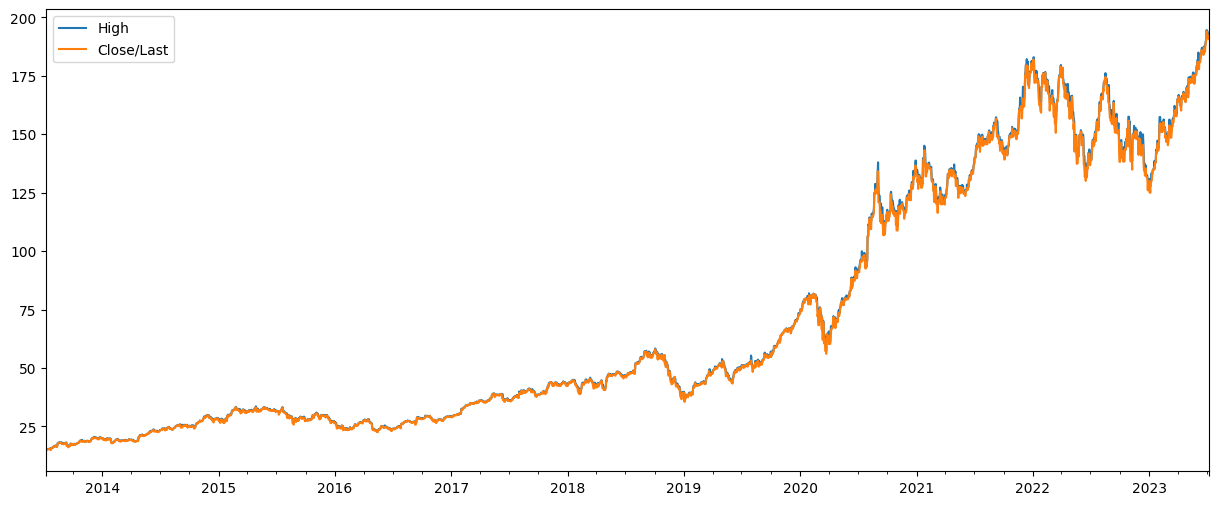

In [11]:
df.plot.line(
    y=["High", "Close/Last"], 
    figsize=(15, 6),
)

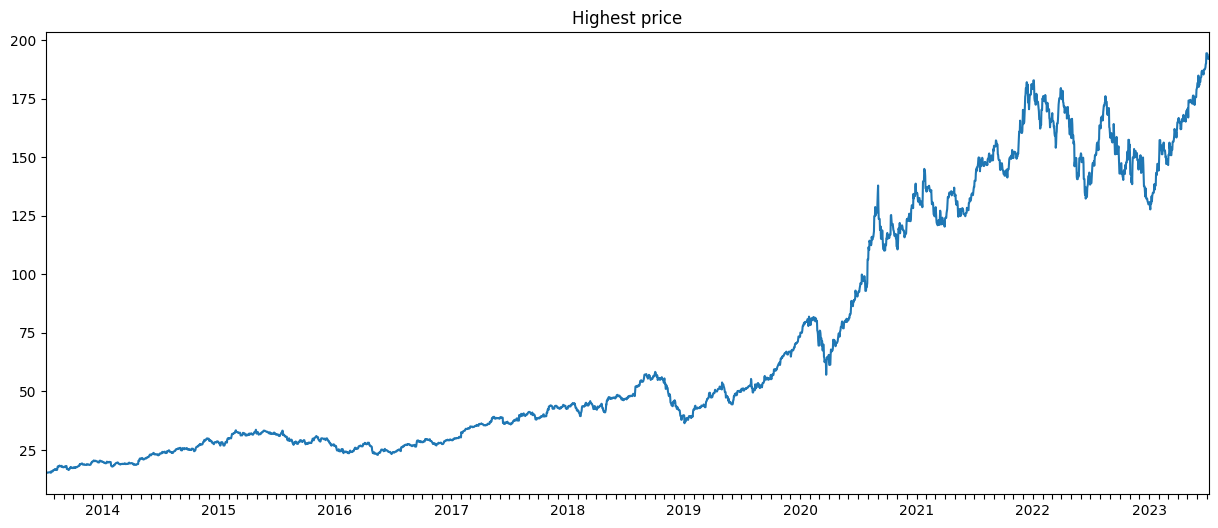

In [12]:
ax = df["High"].plot(
    figsize=(15, 6),
    title="Highest price",
    # xlim=["2022-05-01", "2023-06-30"],
)
ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter("%b"))
# ax.xaxis.set_minor_locator(dates.YearLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter("\n\n%Y"))

# ax.yaxis.grid(True)
# ax.xaxis.grid(True)

In [13]:
df = (
    df
    .reset_index()
    .rename({"index": "Date"}, axis=1)
)
df.to_csv("../data/processed/appl_price_history.csv", index=False)